In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

import pickle

In [ ]:
data = pd.read_csv('https://blent-keskia.s3.eu-west-3.amazonaws.com/poc/cantine/data-meteo.csv')
data

,Index,Date,Secteur,Commentaire semaine,Commentaire jour,Code_entrée,Entrée,Code_plat,Plat,Code_légumes,...,Gouter,Code_gouter_02,Gouter_02,Taux participation,Température,Humidité,Vitesse du vent moyen 10 mn,Taux gaspillage,Attente moyenne,Allergies
0,0,2016-03-21,3.0,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,...,Pain/ confiture d'abricots/ lait,NaN,NaN,0.93,10.7,58,4.5,0.04,38.346453,0.00
1,1,2016-03-21,1.0,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,...,Pain/ confiture d'abricots/ lait,NaN,NaN,0.95,10.7,58,4.5,0.04,0.000000,0.02
2,2,2016-03-21,2.0,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,...,Pain/ confiture d'abricots/ lait,NaN,NaN,0.89,10.7,58,4.5,0.04,13.527442,0.02
3,3,2016-03-22,3.0,NaN,NaN,AB,"Salade floride (carotte râpée, dé d'orange)",NaN,Poulet rôti,NaN,...,Pain/ beurre/ barre chocolatée/ lait,NaN,NaN,0.93,11.2,50,4.3,0.35,17.617790,0.02
4,4,2016-03-22,1.0,NaN,NaN,AB,"Salade floride (carotte râpée, dé d'orange)",NaN,Poulet rôti,NaN,...,Pain/ beurre/ barre chocolatée/ lait,NaN,NaN,0.92,11.2,50,4.3,0.40,14.935822,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,5132,2023-01-20,1.0,NaN,NaN,BIO,Crème de carottes,DUR,Filet de saumon à l'oseille,NaN,...,Pain / beurre\nCorbeille de fruits \nLait ou f...,BIO,Pain au lait\nPomme,0.90,3.3,86,0.5,0.04,6.870966,0.02
5133,5133,2023-01-20,3.0,NaN,NaN,BIO,Crème de carottes,DUR,Filet de saumon à l'oseille,NaN,...,Pain / beurre\nCorbeille de fruits \nLait ou f...,BIO,Pain au lait\nPomme,0.93,3.3,86,0.5,0.04,5.905211,0.00
5134,5134,2023-01-23,1.0,NaN,NaN,BIO,Betteraves au miel,FR / BIO / DUR,Sauté de porc sauce charcutière OU Rôti de din...,NaN,...,Brioche\nBarre chocolatée\nLait,NaN,Brioche\nBarre chocolatée,0.93,3.8,76,3.6,0.04,0.000000,0.00
5135,5135,2023-01-23,3.0,NaN,NaN,BIO,Betteraves au miel,FR / BIO / DUR,Rôti de porc OU Rôti de dinde OU Galette texas*,NaN,...,Brioche\nBarre chocolatée\nLait,NaN,Brioche\nBarre chocolatée,0.92,3.8,76,3.6,0.04,37.807232,0.02


In [ ]:
data.describe()

,Index,Secteur,Taux participation,Température,Humidité,Vitesse du vent moyen 10 mn,Taux gaspillage,Attente moyenne,Allergies
count,5137.000000,5133.000000,5137.000000,5137.000000,5137.000000,5131.000000,5137.000000,5137.000000,5137.000000
mean,2568.000000,1.981297,0.775383,13.942749,74.809811,4.031319,0.145519,7.441719,0.009652
std,1483.068497,0.819697,0.267541,5.306684,13.997741,2.163247,0.122804,10.647673,0.009995
min,0.000000,1.000000,0.000000,-2.800000,24.000000,0.000000,0.000000,0.000000,0.000000
25%,1284.000000,1.000000,0.570000,10.500000,65.000000,2.400000,0.040000,0.000000,0.000000
50%,2568.000000,2.000000,0.910000,13.600000,75.000000,3.800000,0.110000,0.619857,0.000000
75%,3852.000000,3.000000,0.930000,17.800000,85.000000,5.300000,0.220000,12.522374,0.020000
max,5136.000000,3.000000,1.000000,33.900000,100.000000,13.300000,0.690000,68.840744,0.020000


In [ ]:
# afficher la somme des valeurs manquantes par colonnes
data.isnull().sum().sort_values(ascending = False)

Code_gouter_02                 4867
Code_laitage                   4594
Commentaire semaine            4547
Gouter_02                      4537
Commentaire jour               4384
Code_légumes                   4046
Code_dessert                   3798
Code_gouter                    3778
Code_entrée                    3154
Code_plat                      2543
Laitage                        1528
Dessert                        1101
Légumes                         623
Plat                            223
Gouter                          167
Entrée                          141
Vitesse du vent moyen 10 mn       6
Secteur                           4
Attente moyenne                   0
Humidité                          0
Taux gaspillage                   0
Index                             0
Température                       0
Taux participation                0
Date                              0
Allergies                         0
dtype: int64

In [ ]:
# voir les types
data.dtypes

Index                            int64
Date                            object
Secteur                        float64
Commentaire semaine             object
Commentaire jour                object
Code_entrée                     object
Entrée                          object
Code_plat                       object
Plat                            object
Code_légumes                    object
Légumes                         object
Code_laitage                    object
Laitage                         object
Code_dessert                    object
Dessert                         object
Code_gouter                     object
Gouter                          object
Code_gouter_02                  object
Gouter_02                       object
Taux participation             float64
Température                    float64
Humidité                         int64
Vitesse du vent moyen 10 mn    float64
Taux gaspillage                float64
Attente moyenne                float64
Allergies                

In [ ]:
# Separation des variables numeriques et categoriques
data_cat = []
data_num = []
for i,t in enumerate(data.dtypes):
  if t == object :
    data_cat.append(data.iloc[:,i])
  else:
    data_num.append(data.iloc[:,i])

data_cat = pd.DataFrame(data_cat).transpose()
data_num = pd.DataFrame(data_num).transpose()

In [ ]:
data_cat

,Date,Commentaire semaine,Commentaire jour,Code_entrée,Entrée,Code_plat,Plat,Code_légumes,Légumes,Code_laitage,Laitage,Code_dessert,Dessert,Code_gouter,Gouter,Code_gouter_02,Gouter_02
0,2016-03-21,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,Lentilles,NaN,Crme au chocolat,NaN,NaN,NaN,Pain/ confiture d'abricots/ lait,NaN,NaN
1,2016-03-21,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,Lentilles,NaN,Crme au chocolat,NaN,NaN,NaN,Pain/ confiture d'abricots/ lait,NaN,NaN
2,2016-03-21,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,Lentilles,NaN,Crme au chocolat,NaN,NaN,NaN,Pain/ confiture d'abricots/ lait,NaN,NaN
3,2016-03-22,NaN,NaN,AB,"Salade floride (carotte râpée, dé d'orange)",NaN,Poulet rôti,NaN,Frites,NaN,Saint Paulin,NaN,Compote pommes/ fraises,NaN,Pain/ beurre/ barre chocolatée/ lait,NaN,NaN
4,2016-03-22,NaN,NaN,AB,"Salade floride (carotte râpée, dé d'orange)",NaN,Poulet rôti,NaN,Frites,NaN,Saint Paulin,NaN,Compote pommes/ fraises,NaN,Pain/ beurre/ barre chocolatée/ lait,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,2023-01-20,NaN,NaN,BIO,Crème de carottes,DUR,Filet de saumon à l'oseille,NaN,Pommes de terre vapeur,NaN,Fromage,BIO,Fruit de saison,BIO,Pain / beurre\nCorbeille de fruits \nLait ou f...,BIO,Pain au lait\nPomme
5133,2023-01-20,NaN,NaN,BIO,Crème de carottes,DUR,Filet de saumon à l'oseille,NaN,Pommes de terre vapeur,NaN,Fromage,BIO,Fruit de saison,BIO,Pain / beurre\nCorbeille de fruits \nLait ou f...,BIO,Pain au lait\nPomme
5134,2023-01-23,NaN,NaN,BIO,Betteraves au miel,FR / BIO / DUR,Sauté de porc sauce charcutière OU Rôti de din...,NaN,Haricots blancs,NaN,Fromage,BIO,Fruit de saison,BIO,Brioche\nBarre chocolatée\nLait,NaN,Brioche\nBarre chocolatée
5135,2023-01-23,NaN,NaN,BIO,Betteraves au miel,FR / BIO / DUR,Rôti de porc OU Rôti de dinde OU Galette texas*,NaN,Haricots blancs,NaN,Fromage,BIO,Fruit de saison,BIO,Brioche\nBarre chocolatée\nLait,NaN,Brioche\nBarre chocolatée


In [ ]:
'''from sklearn.preprocessing import OneHotEncoder
# Créer un objet OneHotEncoder avec sparse=False pour obtenir un tableau numpy
encoder = OneHotEncoder(sparse=False)

# Encoder la colonne sexe en utilisant la méthode fit_transform
my_encoded = encoder.fit_transform(data_cat)

'''
#remplacer les valeurs categoriques par 0,1,2,...
lab_enc = LabelEncoder()
for i in data_cat:
  data_cat[i] = lab_enc.fit_transform(data_cat[i])
data_cat

,Date,Commentaire semaine,Commentaire jour,Code_entrée,Entrée,Code_plat,Plat,Code_légumes,Légumes,Code_laitage,Laitage,Code_dessert,Dessert,Code_gouter,Gouter,Code_gouter_02,Gouter_02
0,0,13,74,17,291,82,693,16,168,14,12,12,270,11,459,1,86
1,0,13,74,17,291,82,693,16,168,14,12,12,270,11,459,1,86
2,0,13,74,17,291,82,693,16,168,14,12,12,270,11,459,1,86
3,1,13,74,0,568,94,546,16,99,14,98,12,89,11,407,1,86
4,1,13,74,0,568,94,546,16,99,14,98,12,89,11,407,1,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,1746,13,74,13,211,29,330,16,215,14,48,5,175,2,264,0,61
5133,1746,13,74,13,211,29,330,16,215,14,48,5,175,2,264,0,61
5134,1747,13,74,13,24,45,911,16,143,14,48,5,175,2,29,1,13
5135,1747,13,74,13,24,45,660,16,143,14,48,5,175,2,29,1,13


In [ ]:
# afficher la somme des valeurs manquantes par colonnes
data_cat.isnull().sum().sort_values(ascending = False)

Date                   0
Code_laitage           0
Code_gouter_02         0
Gouter                 0
Code_gouter            0
Dessert                0
Code_dessert           0
Laitage                0
Légumes                0
Commentaire semaine    0
Code_légumes           0
Plat                   0
Code_plat              0
Entrée                 0
Code_entrée            0
Commentaire jour       0
Gouter_02              0
dtype: int64

In [ ]:
# Pour les variables numeriques, remplaces les valeurs manquantes par la valeurs precedentes
data_num.fillna(value=data_num.mean(), inplace=True)

In [ ]:
data_num.isnull().sum().sort_values(ascending = False)

Index                          0
Secteur                        0
Taux participation             0
Température                    0
Humidité                       0
Vitesse du vent moyen 10 mn    0
Taux gaspillage                0
Attente moyenne                0
Allergies                      0
dtype: int64

In [ ]:
# Suppression de la colonne Loan_ID
data_num.drop('Taux participation', axis=1, inplace=True)
data_num

,Index,Secteur,Température,Humidité,Vitesse du vent moyen 10 mn,Taux gaspillage,Attente moyenne,Allergies
0,0.0,3.0,10.7,58.0,4.5,0.04,38.346453,0.00
1,1.0,1.0,10.7,58.0,4.5,0.04,0.000000,0.02
2,2.0,2.0,10.7,58.0,4.5,0.04,13.527442,0.02
3,3.0,3.0,11.2,50.0,4.3,0.35,17.617790,0.02
4,4.0,1.0,11.2,50.0,4.3,0.40,14.935822,0.00
...,...,...,...,...,...,...,...,...
5132,5132.0,1.0,3.3,86.0,0.5,0.04,6.870966,0.02
5133,5133.0,3.0,3.3,86.0,0.5,0.04,5.905211,0.00
5134,5134.0,1.0,3.8,76.0,3.6,0.04,0.000000,0.00
5135,5135.0,3.0,3.8,76.0,3.6,0.04,37.807232,0.02


In [ ]:
target=data_num['Taux gaspillage']
# target

In [ ]:
data_num.drop('Taux gaspillage', axis=1, inplace=True)

In [ ]:
X = pd.concat([data_cat, data_num], axis=1)
Y = target

In [ ]:
X.isnull().sum().sort_values()

Date                           0
Vitesse du vent moyen 10 mn    0
Humidité                       0
Température                    0
Secteur                        0
Index                          0
Gouter_02                      0
Code_gouter_02                 0
Gouter                         0
Code_gouter                    0
Dessert                        0
Code_dessert                   0
Laitage                        0
Code_laitage                   0
Légumes                        0
Code_légumes                   0
Plat                           0
Code_plat                      0
Entrée                         0
Code_entrée                    0
Commentaire jour               0
Commentaire semaine            0
Attente moyenne                0
Allergies                      0
dtype: int64

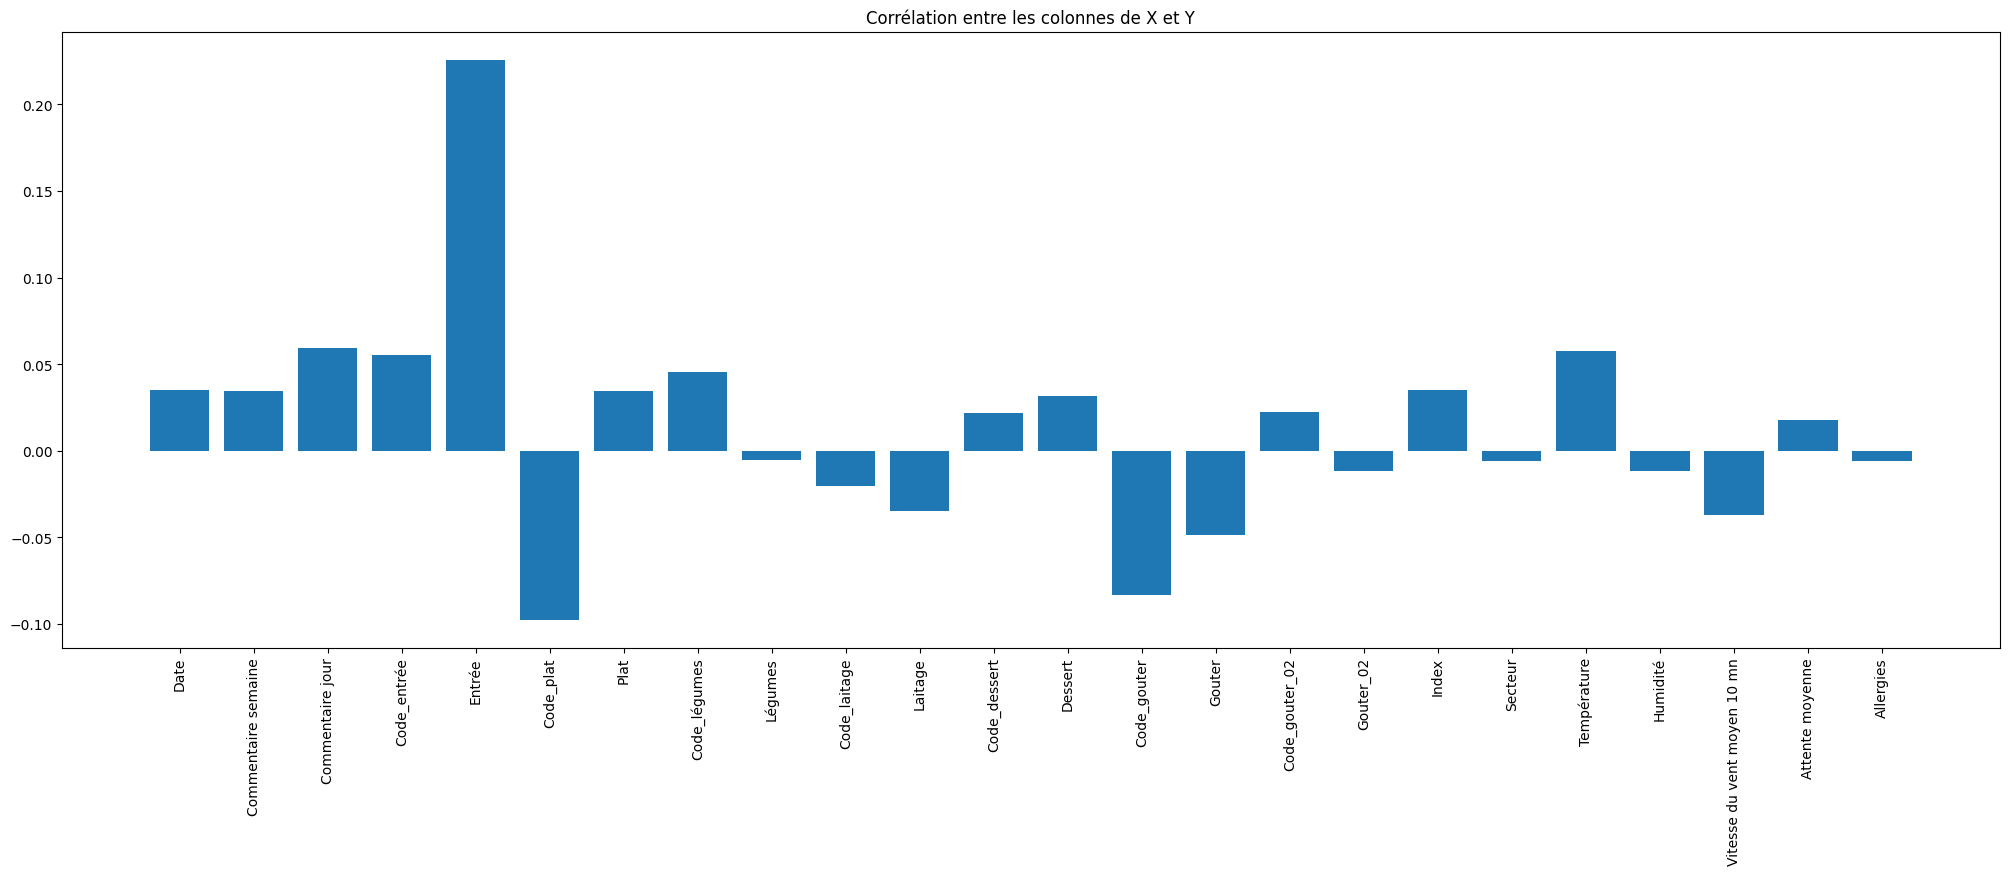

In [ ]:
# Calculer la corrélation entre chaque colonne de X et Y
corr = X.corrwith(Y)

# Création d'une figure de taille 25x8 pouces
fig = plt.figure(figsize=(25, 8))
# Afficher la corrélation dans un histogramme
plt.bar(corr.index, corr.values)
plt.title('Corrélation entre les colonnes de X et Y')
plt.xticks(rotation=90)

plt.show()


In [ ]:
corr

Date                           0.035172
Commentaire semaine            0.034831
Commentaire jour               0.059230
Code_entrée                    0.055071
Entrée                         0.225895
Code_plat                     -0.097377
Plat                           0.034651
Code_légumes                   0.045393
Légumes                       -0.005058
Code_laitage                  -0.020576
Laitage                       -0.034866
Code_dessert                   0.021818
Dessert                        0.031888
Code_gouter                   -0.083082
Gouter                        -0.048790
Code_gouter_02                 0.022521
Gouter_02                     -0.011902
Index                          0.035371
Secteur                       -0.005663
Température                    0.057692
Humidité                      -0.011407
Vitesse du vent moyen 10 mn   -0.037264
Attente moyenne                0.017887
Allergies                     -0.006063
dtype: float64

In [ ]:
# Supprimer les colonnes du dataframe X en utilisant la méthode drop
X.drop(["Code_légumes","Vitesse du vent moyen 10 mn","Humidité","Attente moyenne","Secteur"], axis=1, inplace=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
print('La taille de X_train est:', X_train.shape)
print('La taille de X_test est:', X_test.shape)
print('La taille de Y_train est:', Y_train.shape)
print('La taille de Y_test est:', Y_test.shape)

La taille de X_train est: (3852, 19)
La taille de X_test est: (1285, 19)
La taille de Y_train est: (3852,)
La taille de Y_test est: (1285,)


In [ ]:
# Définir une fonction qui prend en entrée les données X_train,Y_train,X_test,Y_test
def compare_regression_models(X_train,Y_train,X_test,Y_test):
  # Créer une liste des noms des algorithmes de régression
  names = ['LinearReg', 'RidgeReg', 'LassoReg', 'DecisionTreeReg', 'SVM Reg', 'KNN Reg', 'Random Forest Reg', 'Gradient Boosting Reg', 'XGB Reg', 'Ada Boost Reg', 'ElasticNet', 'ExtraTreesReg']

  # Créer une liste des objets des algorithmes de régression
  models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), SVR(), KNeighborsRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor(), AdaBoostRegressor(), ElasticNet(), ExtraTreesRegressor()]

  # Créer une liste vide pour stocker les scores des modèles
  scores = []

  # Parcourir la liste des modèles
  for model in models:
    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train, Y_train)

    # Prédire les valeurs pour les données de test
    Y_pred = model.predict(X_test)

    # Calculer le score R-carré du modèle et le convertir en pourcentage
    score = model.score(X_test, Y_test) * 100

    # Ajouter le score à la liste des scores
    scores.append(score)

  # Création d'une figure de taille 18x8 pouces
  fig = plt.figure(figsize=(18, 8))
  # Afficher les scores dans un histogramme
  plt.bar(names, scores)
  plt.title('Comparaison des algorithmes de régression')
  plt.xlabel('Algorithme')
  plt.ylabel('Score R-carré (%)')
  plt.xticks(rotation=90)

  # Parcourir la liste des scores et afficher chaque score au-dessus de la barre correspondante
  for i in range(len(scores)):
    plt.text(x=i-0.3, y=scores[i]+1, s=f"{scores[i]:.2f}%", fontsize=10)

  plt.show()

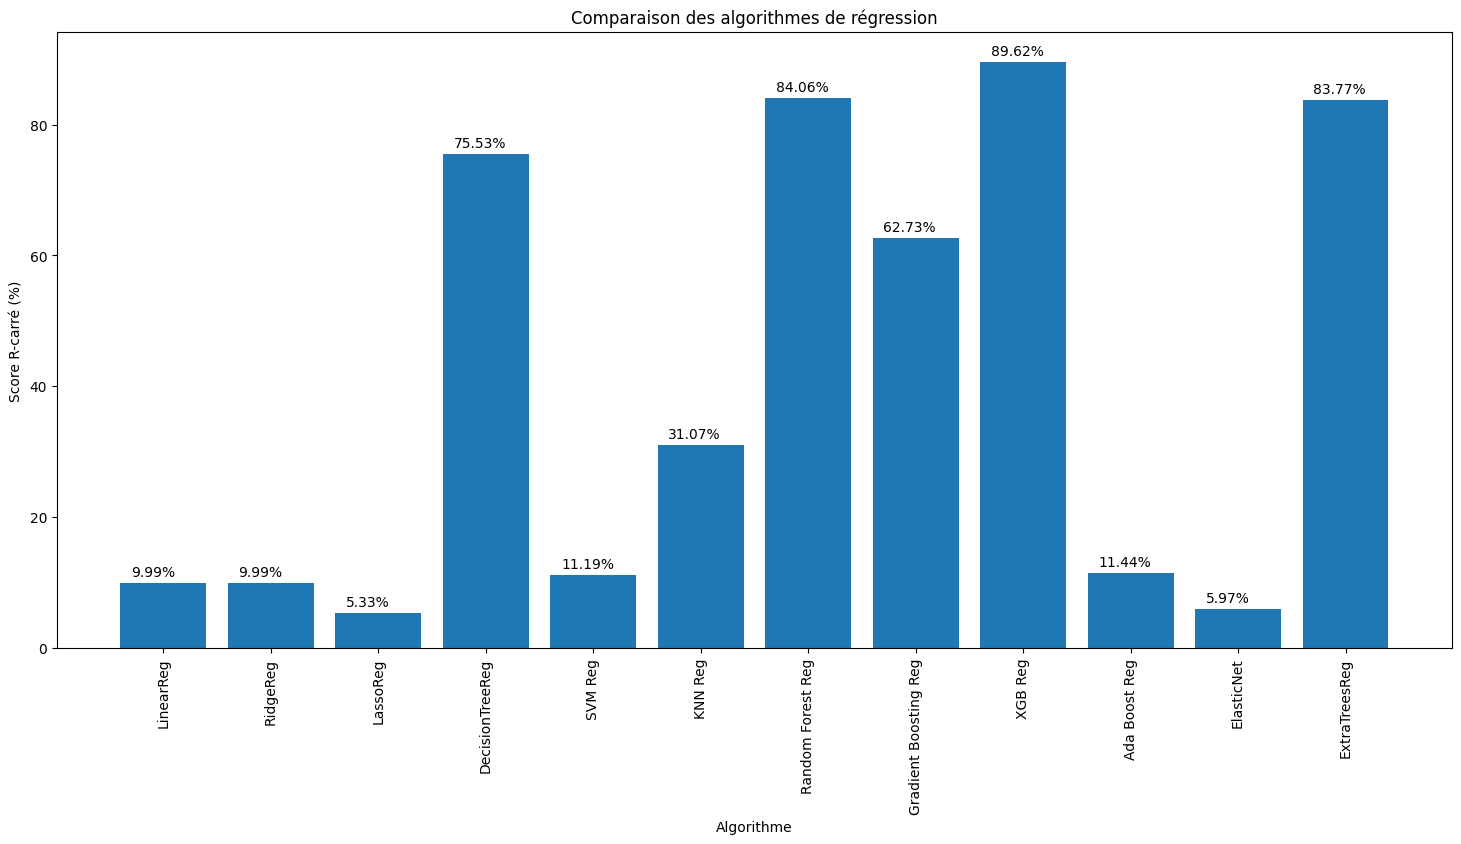

In [ ]:
compare_regression_models(X_train,Y_train,X_test,Y_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

LinearReg:
Best hyperparameters: {}
Train score: 0.08442897199645627
Test score: 0.09985663402499123
RidgeReg:
Best hyperparameters: {'alpha': 7.742636826811277}
Train score: 0.08436665678069655
Test score: 0.10007632193217941


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.071e+01, tolerance: 4.753e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.021e+01, tolerance: 4.705e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.986e+01, tolerance: 4.570e-03

LassoReg:
Best hyperparameters: {'alpha': 0.001}
Train score: 0.08142811466873023
Test score: 0.09747975131498887


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+01, tolerance: 4.753e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+01, tolerance: 4.705e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.089e+01, tolerance: 4.570e-03

ElasticNet:
Best hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.1}
Train score: 0.0835029071738631
Test score: 0.09774645601081966
DecisionTreeReg:
Best hyperparameters: {'max_depth': 10, 'min_samples_split': 5}
Train score: 0.8418392021303416
Test score: 0.6804830023023827
Random Forest Reg:
Best hyperparameters: {'max_depth': 5, 'n_estimators': 150}
Train score: 0.45757839619935625
Test score: 0.4288259829792628
Gradient Boosting Reg:
Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train score: 0.6535669161805128
Test score: 0.6269470865701192
SVM Reg:
Best hyperparameters: {'C': 2.1544346900318843, 'gamma': 0.001}
Train score: 0.5804097071650802
Test score: 0.44965605182122115
KNN Reg:
Best hyperparameters: {'n_neighbors': 1}
Train score: 1.0
Test score: 0.682523242196619
XGB Reg:
Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}
Train score: 0.83075183205946
Test score: 0.753586134640724
Ada Boost Reg:
Best hyperparameters: {'learning_rate': 0.1, '

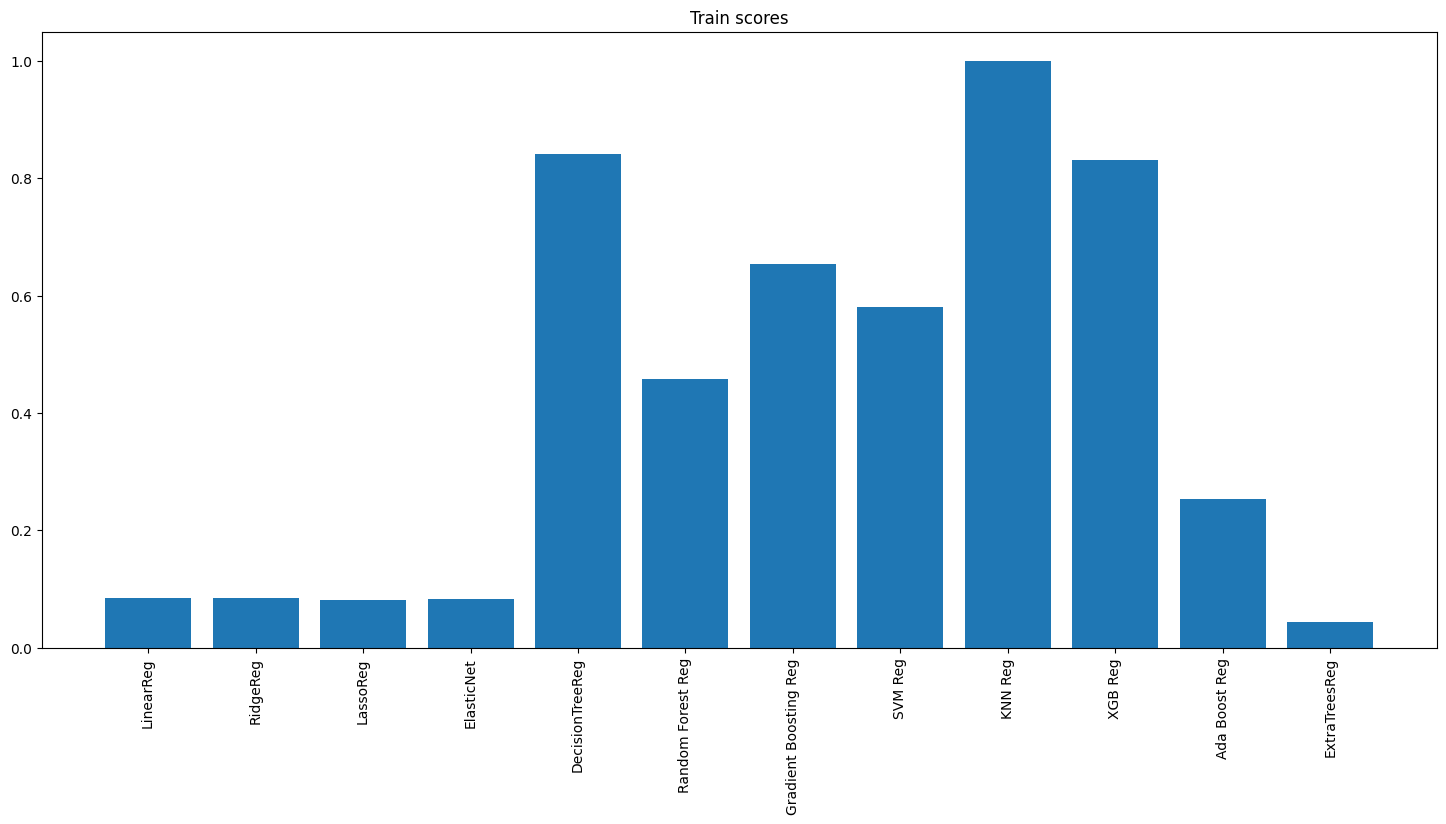

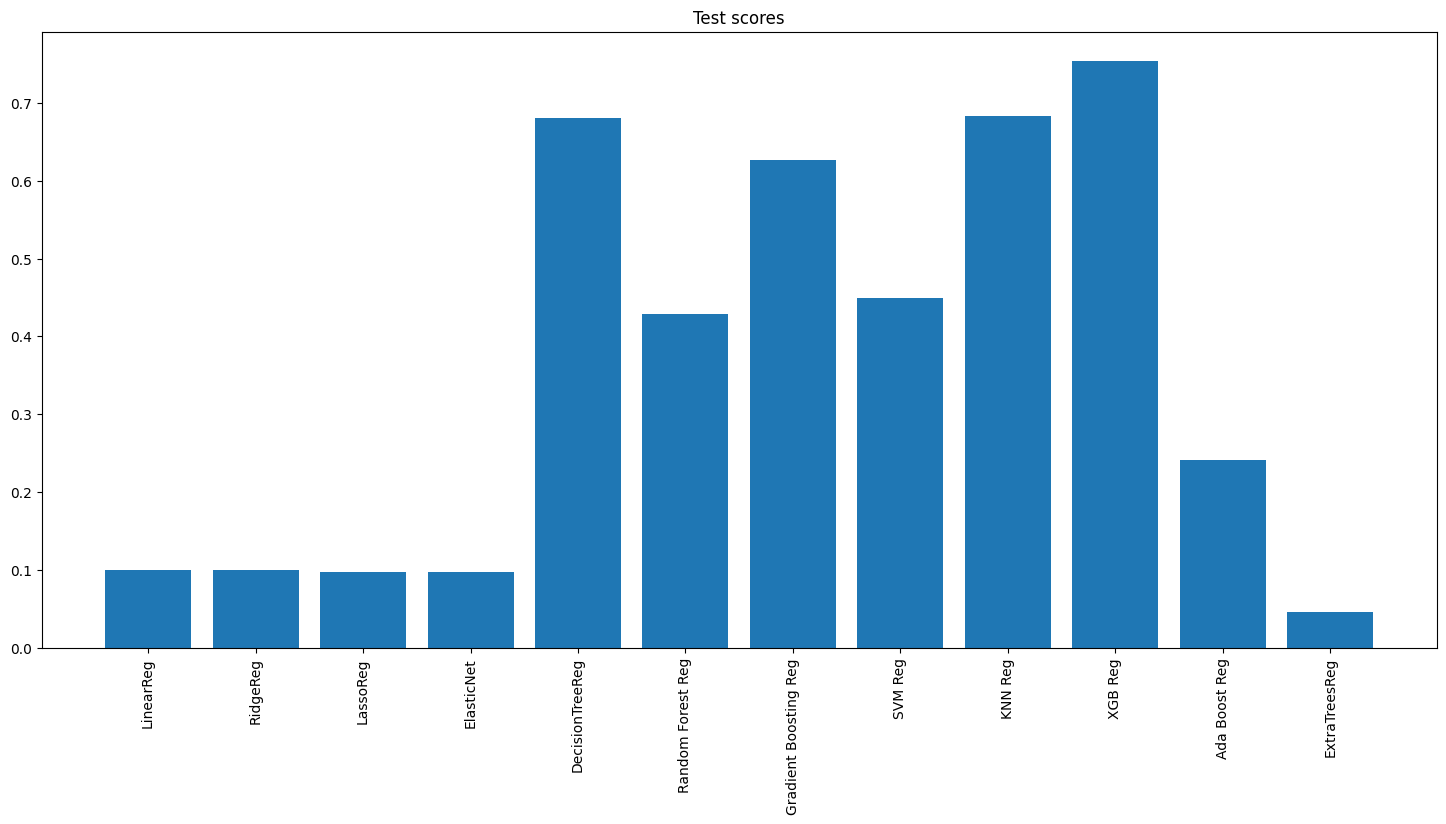

In [ ]:
def compare_models3(X_train, Y_train, X_test, Y_test):
    models = {
        'LinearReg': LinearRegression(),
        'RidgeReg': Ridge(),
        'LassoReg': Lasso(),
        'ElasticNet': ElasticNet(),
        'DecisionTreeReg': DecisionTreeRegressor(),
        'Random Forest Reg': RandomForestRegressor(),
        'Gradient Boosting Reg': GradientBoostingRegressor(),
        'SVM Reg': SVR(),
        'KNN Reg': KNeighborsRegressor(),
        'XGB Reg': XGBRegressor(objective='reg:squarederror'),
        'Ada Boost Reg': AdaBoostRegressor(),
        'ExtraTreesReg': ExtraTreesRegressor()
    }
    param_grids = {
        'LinearReg': {},
        'RidgeReg': {'alpha': np.logspace(-3, 2, 10)},
        'LassoReg': {'alpha': np.logspace(-3, 2, 10)},
        'ElasticNet': {'alpha': np.logspace(-3,-1,10), 'l1_ratio': np.linspace(0.1,0.9,10)},
        'DecisionTreeReg': {'max_depth': range(1,11), 'min_samples_split': range(2,12)},
        'Random Forest Reg': {'n_estimators': [10,50,100,150,200], 'max_depth': range(1,6)},
        'Gradient Boosting Reg':{'n_estimators': [10,50,100], 'learning_rate': np.logspace(-3,-1,10)},
        'SVM Reg':{'C': np.logspace(-3, 2, 10), 'gamma': np.logspace(-3, 2, 10)},
        'KNN Reg':{'n_neighbors': range(1,11)},
        'XGB Reg':{'n_estimators': [10,50], 'learning_rate': np.logspace(-3,-1,10)},
        'Ada Boost Reg':{'n_estimators': [10], 'learning_rate': np.logspace(-3,-1,10)},
        'ExtraTreesReg':{'n_estimators': [10],'max_depth':[1]}
    }

    train_scores = []
    test_scores = []
    for name,model in models.items():
        grid = GridSearchCV(model,param_grids[name],cv=5)
        grid.fit(X_train,Y_train)
        train_score = r2_score(Y_train ,grid.predict(X_train))
        test_score = r2_score(Y_test ,grid.predict(X_test))
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f'{name}:')
        print(f'Best hyperparameters: {grid.best_params_}')
        print(f'Train score: {train_score}')
        print(f'Test score: {test_score}')

    fig = plt.figure(figsize=(18,8))
    plt.bar(range(len(models)), train_scores,tick_label=list(models.keys()))
    plt.title('Train scores')
    plt.xticks(rotation=90)
    plt.show()

    fig = plt.figure(figsize=(18,8))
    plt.bar(range(len(models)), test_scores,tick_label=list(models.keys()))
    plt.title('Test scores')
    plt.xticks(rotation=90)
    plt.show()

# Exemple d'utilisation :
compare_models3(X_train,Y_train,X_test,Y_test)

In [ ]:
best_model =  XGBRegressor(learning_rate = 0.1, n_estimators = 50, objective='reg:squarederror')

In [ ]:
best_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
best_model.predict(X_test)

array([0.36329636, 0.16410625, 0.1299332 , ..., 0.08132149, 0.11484743,
       0.10333318], dtype=float32)

75.3586134640724